In [53]:
import PIL
import torch
import torchvision

import numpy as np
import matplotlib.pyplot as plt

from data_utils import load_imagenet_val
from image_utils import preprocess_image
from utils import *
from style_modules import ContentLoss, StyleLoss, TotalVariationLoss
from style_utils import preprocess, style_transfer

#### Example 1

$ f_1: \mathbb{R} \times \mathbb{R} \to \mathbb{R} $

$ f_1(x, y) = 3x^2 + y^2 $

$ \frac{\partial f_1}{dx} = 6x $

$ \frac{\partial f_1}{dy} = 2y $

In [54]:
f_1 = lambda x, y: with_grad(3 * x ** 2 + y ** 2)

In [55]:
x = torch.FloatTensor([5]).requires_grad_(True)
y = torch.FloatTensor([-7]).requires_grad_(True)

In [56]:
f_1(x, y)

tensor([124.], grad_fn=<AddBackward0>)

In [57]:
x.grad

tensor([30.])

In [58]:
y.grad

tensor([-14.])

#### Example 2

$ f_2: \mathbb{R}^2 \to \mathbb{R} $

$ f_2(\langle v_1, v_2 \rangle) = 3v_1^2 + v_2^2 $

$ \nabla f_2 = \langle \frac{\partial f_2}{dv_1}, \frac{\partial f_2}{dv_2} \rangle = \langle 6v_1, 2v_2 \rangle $

In [59]:
f_2 = lambda v: with_grad(3 * v[0] ** 2 + v[1] ** 2)

In [60]:
v = torch.FloatTensor([5, -7]).requires_grad_(True)

In [61]:
f_2(v)

tensor(124., grad_fn=<AddBackward0>)

In [62]:
v.grad

tensor([ 30., -14.])

#### Image example

In [63]:
X, y, class_names = load_imagenet_val(num=16)

(224, 224, 3)

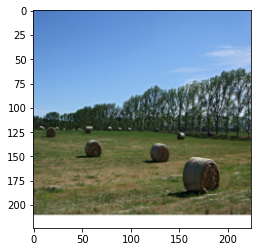

In [65]:
plt.imshow(X[0])
X[0].shape

In [70]:
img_tensor = torch.tensor(preprocess_image(X[0])).requires_grad_(True)

$ f: \mathbb{R}^{h \times w \times 3} \to \mathbb{R} $

$ f(\langle x_1, ..., x_{h \cdot w \cdot 3} \rangle) = \sum_{i=1}^{h \cdot w \cdot 3} x_i^2 $

In [71]:
# Define scalar-valued function on image tensor

f = lambda img: with_grad(img_tensor.square().sum())

In [72]:
f(img_tensor)

tensor(217885.4375, grad_fn=<SumBackward0>)

In [75]:
img_tensor.grad

tensor([[[-1.6328,  0.2003,  3.0491],
         [-1.6671,  0.2003,  3.0491],
         [-1.6328,  0.2003,  3.1188],
         ...,
         [-0.3999,  1.3908,  4.0948],
         [-0.3999,  1.3908,  4.0948],
         [-0.3999,  1.3908,  4.1297]],

        [[-1.6328,  0.2353,  3.1536],
         [-1.6328,  0.2353,  3.1188],
         [-1.5986,  0.2353,  3.0839],
         ...,
         [-0.3999,  1.3908,  4.0948],
         [-0.4341,  1.3908,  4.1297],
         [-0.3999,  1.3908,  4.1645]],

        [[-1.5986,  0.2703,  3.0839],
         [-1.5643,  0.2353,  3.1188],
         [-1.5301,  0.2353,  3.1885],
         ...,
         [-0.3656,  1.4608,  4.1645],
         [-0.3314,  1.4608,  4.1994],
         [-0.3656,  1.4608,  4.1994]],

        ...,

        [[ 4.4978,  4.8571,  5.2800],
         [ 4.4978,  4.8571,  5.2800],
         [ 4.4978,  4.8571,  5.2800],
         ...,
         [ 4.4978,  4.8571,  5.2800],
         [ 4.4978,  4.8571,  5.2800],
         [ 4.4978,  4.8571,  5.2800]],

        [[

#### Pre-trained NN

In [76]:
cnn = torchvision.models.squeezenet1_1(pretrained=True)

preds = []
for i in range(X.shape[0]):
    processed_X = torch.tensor(preprocess_image(X[i])).permute((2, 0, 1))[None,]
    predicted_y = int(cnn(processed_X).argmax())
    preds.append(predicted_y)

In [77]:
print(f"accuracy of the cnn is {(np.array(preds) == y).sum() / y.shape[0]}")

accuracy of the cnn is 0.625


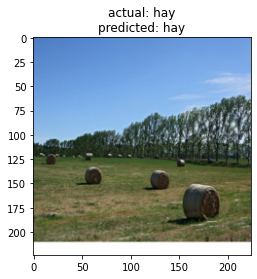

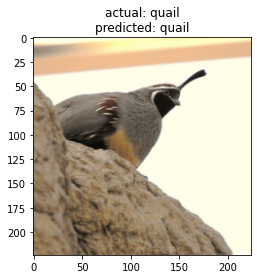

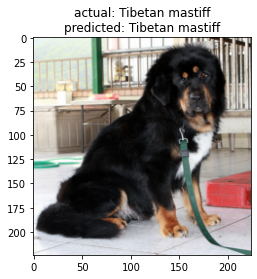

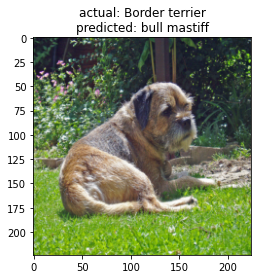

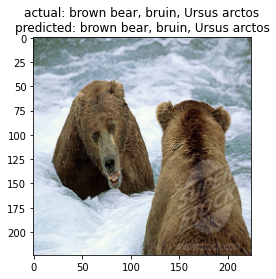

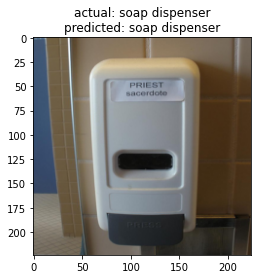

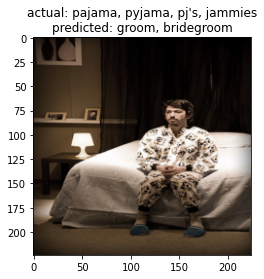

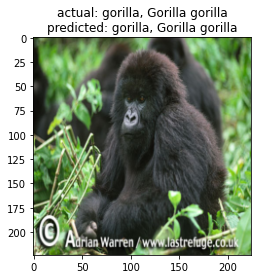

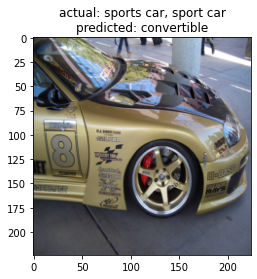

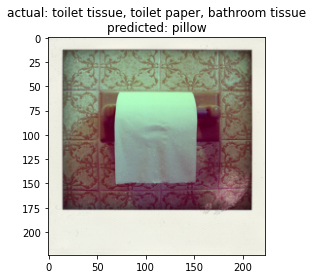

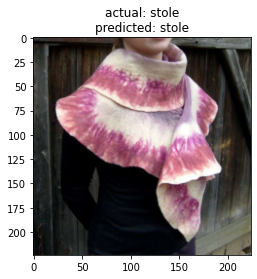

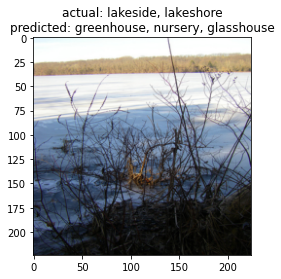

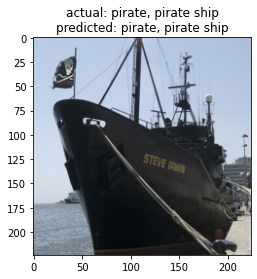

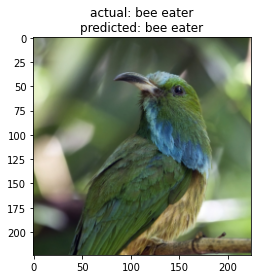

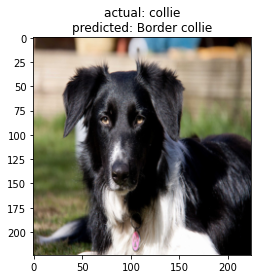

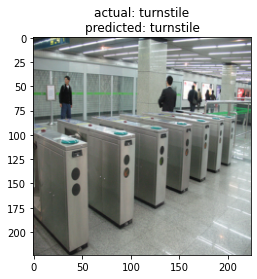

In [78]:
for i in range(X.shape[0]):
    plt.figure()
    plt.imshow(X[i])
    plt.title(f"actual: {class_names[y[i]]}\npredicted: {class_names[preds[i]]}")